<a href="https://colab.research.google.com/github/YashPatel1604/SpeechEmotionDetection/blob/main/SER_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IMPORTING THE LIBRARIES**

In [ ]:
#import the necessary libraries
import pandas as pd
import numpy as np
import os #to deal with audio files 
import seaborn as sns
import matplotlib.pyplot as plt
import librosa #for audio libray files
import librosa.display
from IPython.display import Audio #to displaying audio
from tensorflow import keras
from keras import optimizers

**LOADING THE DATASET AND GETTING THE DATA**

In [ ]:
import zipfile
 
zip_file = "/archive (2).zip"
 
try:
    with zipfile.ZipFile(zip_file) as z:
        z.extractall()
        print("Extracted all")
except:
    print("Invalid file")


Extracted all


In [ ]:
path=[]
labels=[]
for dirname, _, filenames in os.walk("/content/tess toronto emotional speech set data/dataset"):
    for filename in filenames:
        path.append(os.path.join(dirname, filename))
        label=filename.split('_')[-1]
        label=label.split('.')[0]
        labels.append(label.lower())
    if len(path) == 2800:
        break

**CREAT DATAFRAME**

In [ ]:
data=pd.DataFrame()
data["PATH"]=path
data["EMOTION"]=labels
data.head()
data.info()
print(data.shape)
data["EMOTION"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2800 entries, 0 to 2799
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   PATH     2800 non-null   object
 1   EMOTION  2800 non-null   object
dtypes: object(2)
memory usage: 43.9+ KB
(2800, 2)


ps         400
sad        400
neutral    400
angry      400
fear       400
happy      400
disgust    400
Name: EMOTION, dtype: int64

In [ ]:
data['EMOTION'].value_counts()

ps         400
sad        400
neutral    400
angry      400
fear       400
happy      400
disgust    400
Name: EMOTION, dtype: int64

In [ ]:
def WaveForm(pname,sr,emotion):
    plt.figure(figsize=(10,2))
    plt.title(emotion)
    librosa.display.waveshow(pname,sr=sr)
    plt.show()

In [ ]:
data.tail()

,PATH,EMOTION
2795,/content/tess toronto emotional speech set dat...,angry
2796,/content/tess toronto emotional speech set dat...,angry
2797,/content/tess toronto emotional speech set dat...,angry
2798,/content/tess toronto emotional speech set dat...,angry
2799,/content/tess toronto emotional speech set dat...,angry


/content/tess toronto emotional speech set data/dataset/YAF_happy/YAF_ditch_happy.wav


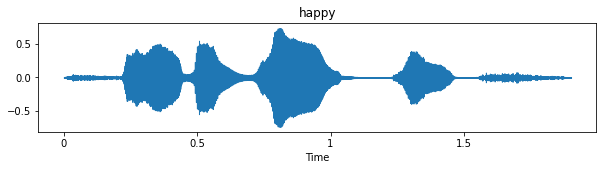

In [ ]:
#from pathlib import Path

emotion="happy"
path = np.array(data["PATH"][data["EMOTION"]==emotion])[0]
print(path)
# print(type(path))
# print(type(emotion))
pname,sampling_rate = librosa.load(str(Path(path)))
WaveForm(pname, sampling_rate, emotion)
print("   ")
Audio(path)
# /content/drive/MyDrive/dataset/audiodata/OAF_Fear

/content/tess toronto emotional speech set data/dataset/YAF_angry/YAF_vine_angry.wav


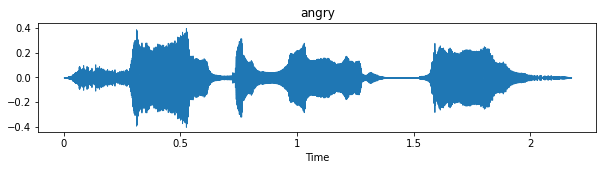

In [ ]:
emotion="angry"
path = np.array(data["PATH"][data["EMOTION"]==emotion])[0]
print(path)
# print(type(path))
# print(type(emotion))
pname,sampling_rate = librosa.load(str(Path(path)))
WaveForm(pname, sampling_rate, emotion)
print("   ")
Audio(path)

/content/tess toronto emotional speech set data/dataset/OAF_Sad/OAF_door_sad.wav


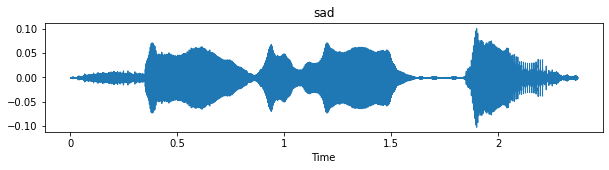

In [ ]:
emotion="sad"
path = np.array(data["PATH"][data["EMOTION"]==emotion])[0]
print(path)
# print(type(path))
# print(type(emotion))
pname,sampling_rate = librosa.load(str(Path(path)))
WaveForm(pname, sampling_rate, emotion)
print("   ")
Audio(path)

/content/tess toronto emotional speech set data/dataset/OAF_Fear/OAF_beg_fear.wav


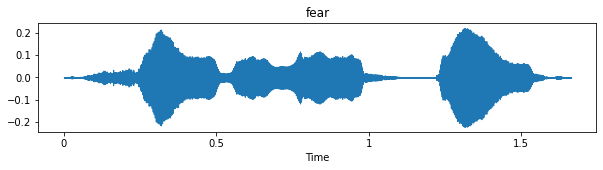

In [ ]:
emotion="fear"
path = np.array(data["PATH"][data["EMOTION"]==emotion])[0]
print(path)
# print(type(path))
# print(type(emotion))
pname,sampling_rate = librosa.load(str(Path(path)))
WaveForm(pname, sampling_rate, emotion)
print("   ")
Audio(path)

/content/tess toronto emotional speech set data/dataset/OAF_neutral/OAF_void_neutral.wav


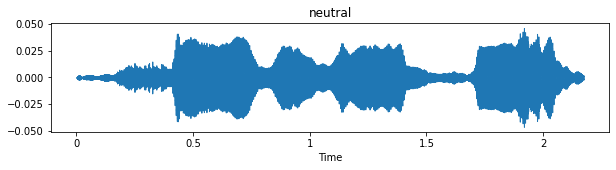

In [ ]:
emotion="neutral"
path = np.array(data["PATH"][data["EMOTION"]==emotion])[0]
print(path)
# print(type(path))
# print(type(emotion))
pname,sampling_rate = librosa.load(str(Path(path)))
WaveForm(pname, sampling_rate, emotion)
print("   ")
Audio(path)

/content/tess toronto emotional speech set data/dataset/YAF_pleasant_surprised/YAF_doll_ps.wav


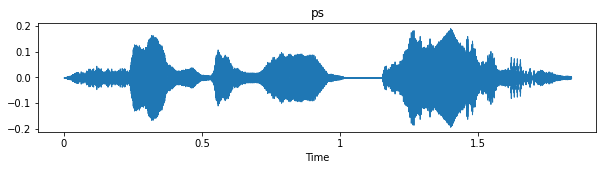

In [ ]:
emotion="ps"
path = np.array(data["PATH"][data["EMOTION"]==emotion])[0]
print(path)
# print(type(path))
# print(type(emotion))
pname,sampling_rate = librosa.load(str(Path(path)))
WaveForm(pname, sampling_rate, emotion)
print("   ")
Audio(path)

/content/tess toronto emotional speech set data/dataset/OAF_disgust/OAF_rain_disgust.wav


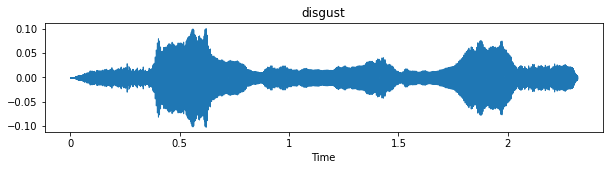

In [ ]:
emotion="disgust"
path = np.array(data["PATH"][data["EMOTION"]==emotion])[0]
print(path)
# print(type(path))
# print(type(emotion))
pname,sampling_rate = librosa.load(str(Path(path)))
WaveForm(pname, sampling_rate, emotion)
print("   ")
Audio(path)

In [ ]:
def extract_mfcc(filename):#Mel-Frequency Cepstral Coefficients
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc


In [ ]:
extract_mfcc(data["PATH"][0])

array([-3.7237723e+02,  1.0081310e+02,  5.5944562e+00, -1.5894274e+01,
       -4.1487659e+01,  2.9727826e+00, -4.6771231e+00, -1.3322883e+01,
       -1.3721253e+01,  3.9629409e+00, -1.8029924e+01,  3.2170281e+00,
       -6.0328946e+00,  8.3990116e+00, -1.8352162e+00,  3.4510827e-01,
       -2.2472634e+00,  5.0675335e+00, -8.6745567e+00,  2.9495981e+00,
       -9.5061445e-01, -3.0923753e+00, -2.2645979e+00,  4.4495857e-01,
       -2.1842682e+00,  4.7348757e+00, -4.4736931e-01,  5.2219901e+00,
       -1.1024109e+00,  2.4599161e+00, -3.1884272e+00,  4.5067987e+00,
        4.4318972e+00,  6.7743716e+00,  7.3412380e+00,  8.0817757e+00,
        5.2503982e+00,  7.6660857e+00,  6.9416924e+00,  8.6653051e+00],
      dtype=float32)

In [ ]:
X_mfcc = data["PATH"].apply(lambda x: extract_mfcc(x))
X_mfcc

0       [-372.37723, 100.8131, 5.594456, -15.894274, -...
1       [-382.68228, 56.498856, -3.421562, 13.160733, ...
2       [-306.81256, 66.600494, -24.690964, 9.566575, ...
3       [-390.5649, 48.978203, -11.268167, 12.74369, -...
4       [-393.16885, 19.519049, 13.446086, 22.733723, ...
                              ...                        
2795    [-407.403, 96.76605, -10.720284, -23.051218, -...
2796    [-397.24475, 83.99001, 6.044303, -19.782827, -...
2797    [-395.64844, 71.37133, -14.626736, -20.951275,...
2798    [-445.0865, 76.34457, -1.5116131, -0.8796062, ...
2799    [-475.64575, 53.789642, 5.6035256, 2.456898, -...
Name: PATH, Length: 2800, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [ ]:
# X = np.expand_dims(X, -1)
# X.shape

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(data[["EMOTION"]])

In [ ]:
y = y.toarray()
y.shape

(2800, 7)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import models,layers
from tensorflow.keras import regularizers
from tensorflow.keras import Sequential

In [ ]:
# model = models.Sequential()
# model.add(layers.Conv2D(32, (3, 3), activation='relu',input_shape=(40,1)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.add(layers.Conv2D(64, (3, 3), activation='relu'))
# model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
# history = model.fit(X_train, y_train, epochs=30, validation_data=(X_test,y_test))

In [ ]:
model = Sequential()
model.add(layers.Conv1D(128, 3, activation='relu', input_shape=(40,1)))
model.add(layers.Conv1D(256, 3, activation='relu'))
model.add(layers.Conv1D(512, 3, activation='relu'))
model.add(layers.Conv1D(1024, 3, activation='relu'))
model.add(layers.Flatten())
model.add(Dense(512, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(Dense(256, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(Dense(7, activation='softmax'))
model.compile(loss='categorical_crossentropy',optimizer=tf.keras.optimizers.RMSprop(learning_rate=0.0005),metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, y_train,epochs=10)

Epoch 1/10
70/70 [==============================] - 45s 617ms/step - loss: 0.9146 - accuracy: 0.7201
Epoch 2/10
70/70 [==============================] - 43s 615ms/step - loss: 0.1753 - accuracy: 0.9536
Epoch 3/10
70/70 [==============================] - 45s 642ms/step - loss: 0.1291 - accuracy: 0.9598
Epoch 4/10
70/70 [==============================] - 42s 600ms/step - loss: 0.0703 - accuracy: 0.9741
Epoch 5/10
70/70 [==============================] - 43s 613ms/step - loss: 0.0513 - accuracy: 0.9848
Epoch 6/10
70/70 [==============================] - 45s 640ms/step - loss: 0.0526 - accuracy: 0.9853
Epoch 7/10
70/70 [==============================] - 44s 625ms/step - loss: 0.0486 - accuracy: 0.9871
Epoch 8/10
70/70 [==============================] - 43s 617ms/step - loss: 0.0314 - accuracy: 0.9897
Epoch 9/10
70/70 [==============================] - 41s 587ms/step - loss: 0.0545 - accuracy: 0.9875
Epoch 10/10
70/70 [==============================] - 42s 600ms/step - loss: 0.0420 - accura

In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

18/18 [==============================] - 3s 141ms/step - loss: 0.0167 - accuracy: 0.9946


In [133]:
ypred=model.predict(X_test)